## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
    
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [6]:
"""
Compile 模型
"""
opt = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)

In [7]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 4s 70us/step - loss: 2.2590 - acc: 0.1705 - val_loss: 2.2046 - val_acc: 0.2137
Epoch 2/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.1790 - acc: 0.2216 - val_loss: 2.1492 - val_acc: 0.2360
Epoch 3/500
50000/50000 [==============================] - 2s 38us/step - loss: 2.1296 - acc: 0.2440 - val_loss: 2.1057 - val_acc: 0.2562
Epoch 4/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0898 - acc: 0.2614 - val_loss: 2.0688 - val_acc: 0.2726
Epoch 5/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0559 - acc: 0.2757 - val_loss: 2.0374 - val_acc: 0.2834
Epoch 6/500
50000/50000 [==============================] - 2s 37us/step - loss: 2.0267 - acc: 0.2895 - val_loss: 2.0112 - val_acc: 0.2926
Epoch 7/500
50000/50000 [==============================] - 2s 38us/step - 

50000/50000 [==============================] - 2s 37us/step - loss: 1.6611 - acc: 0.4226 - val_loss: 1.6659 - val_acc: 0.4176
Epoch 58/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6579 - acc: 0.4235 - val_loss: 1.6650 - val_acc: 0.4180
Epoch 59/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6547 - acc: 0.4239 - val_loss: 1.6606 - val_acc: 0.4223
Epoch 60/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6516 - acc: 0.4259 - val_loss: 1.6577 - val_acc: 0.4246
Epoch 61/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.6487 - acc: 0.4267 - val_loss: 1.6578 - val_acc: 0.4247
Epoch 62/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6461 - acc: 0.4276 - val_loss: 1.6541 - val_acc: 0.4225
Epoch 63/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.6428 - acc: 0.4275 - val_loss: 1.6493 - val_acc: 0.4280
Epoch 64/500
50000/50000 [==============

Epoch 116/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5226 - acc: 0.4705 - val_loss: 1.5479 - val_acc: 0.4608
Epoch 117/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5204 - acc: 0.4703 - val_loss: 1.5453 - val_acc: 0.4591
Epoch 118/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5189 - acc: 0.4720 - val_loss: 1.5450 - val_acc: 0.4603
Epoch 119/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5168 - acc: 0.4728 - val_loss: 1.5415 - val_acc: 0.4638
Epoch 120/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5150 - acc: 0.4737 - val_loss: 1.5404 - val_acc: 0.4631
Epoch 121/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5132 - acc: 0.4726 - val_loss: 1.5436 - val_acc: 0.4574
Epoch 122/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.5113 - acc: 0.4744 - val_loss: 1.5375 - val_acc: 0.4644
Epoch 123/500
50000/

50000/50000 [==============================] - 2s 37us/step - loss: 1.4258 - acc: 0.5027 - val_loss: 1.4769 - val_acc: 0.4828
Epoch 175/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4246 - acc: 0.5037 - val_loss: 1.4786 - val_acc: 0.4791
Epoch 176/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.4228 - acc: 0.5050 - val_loss: 1.4736 - val_acc: 0.4842
Epoch 177/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4214 - acc: 0.5037 - val_loss: 1.4733 - val_acc: 0.4848
Epoch 178/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4201 - acc: 0.5045 - val_loss: 1.4710 - val_acc: 0.4833
Epoch 179/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4180 - acc: 0.5052 - val_loss: 1.4721 - val_acc: 0.4829
Epoch 180/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.4169 - acc: 0.5078 - val_loss: 1.4693 - val_acc: 0.4839
Epoch 181/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.3439 - acc: 0.5330 - val_loss: 1.4198 - val_acc: 0.5002
Epoch 233/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3426 - acc: 0.5323 - val_loss: 1.4266 - val_acc: 0.4985
Epoch 234/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3410 - acc: 0.5333 - val_loss: 1.4305 - val_acc: 0.4912
Epoch 235/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3393 - acc: 0.5340 - val_loss: 1.4184 - val_acc: 0.5010
Epoch 236/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.3381 - acc: 0.5349 - val_loss: 1.4203 - val_acc: 0.4996
Epoch 237/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3368 - acc: 0.5353 - val_loss: 1.4216 - val_acc: 0.5002
Epoch 238/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.3365 - acc: 0.5353 - val_loss: 1.4150 - val_acc: 0.5010
Epoch 239/500
50000/50000 [=======

50000/50000 [==============================] - 2s 38us/step - loss: 1.2713 - acc: 0.5585 - val_loss: 1.3808 - val_acc: 0.5141
Epoch 291/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2697 - acc: 0.5591 - val_loss: 1.3817 - val_acc: 0.5123
Epoch 292/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2683 - acc: 0.5593 - val_loss: 1.3859 - val_acc: 0.5108
Epoch 293/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2674 - acc: 0.5586 - val_loss: 1.3820 - val_acc: 0.5117
Epoch 294/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2653 - acc: 0.5608 - val_loss: 1.3812 - val_acc: 0.5112
Epoch 295/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2650 - acc: 0.5596 - val_loss: 1.3882 - val_acc: 0.5072
Epoch 296/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2643 - acc: 0.5611 - val_loss: 1.3826 - val_acc: 0.5110
Epoch 297/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.2047 - acc: 0.5810 - val_loss: 1.3657 - val_acc: 0.5154
Epoch 349/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2035 - acc: 0.5814 - val_loss: 1.3633 - val_acc: 0.5161
Epoch 350/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2023 - acc: 0.5817 - val_loss: 1.3549 - val_acc: 0.5217
Epoch 351/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.2011 - acc: 0.5825 - val_loss: 1.3603 - val_acc: 0.5201
Epoch 352/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1996 - acc: 0.5815 - val_loss: 1.3658 - val_acc: 0.5166
Epoch 353/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1992 - acc: 0.5838 - val_loss: 1.3664 - val_acc: 0.5164
Epoch 354/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1970 - acc: 0.5843 - val_loss: 1.3552 - val_acc: 0.5191
Epoch 355/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.1408 - acc: 0.6030 - val_loss: 1.3420 - val_acc: 0.5265
Epoch 407/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1406 - acc: 0.6036 - val_loss: 1.3515 - val_acc: 0.5206
Epoch 408/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1396 - acc: 0.6037 - val_loss: 1.3436 - val_acc: 0.5226
Epoch 409/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1386 - acc: 0.6031 - val_loss: 1.3760 - val_acc: 0.5149
Epoch 410/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1374 - acc: 0.6036 - val_loss: 1.3614 - val_acc: 0.5201
Epoch 411/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1374 - acc: 0.6030 - val_loss: 1.3583 - val_acc: 0.5221
Epoch 412/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.1341 - acc: 0.6052 - val_loss: 1.3606 - val_acc: 0.5239
Epoch 413/500
50000/50000 [=======

50000/50000 [==============================] - 2s 37us/step - loss: 1.0814 - acc: 0.6240 - val_loss: 1.3661 - val_acc: 0.5213
Epoch 465/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0805 - acc: 0.6237 - val_loss: 1.3853 - val_acc: 0.5123
Epoch 466/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0802 - acc: 0.6240 - val_loss: 1.3607 - val_acc: 0.5216
Epoch 467/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0778 - acc: 0.6259 - val_loss: 1.3342 - val_acc: 0.5292
Epoch 468/500
50000/50000 [==============================] - 2s 38us/step - loss: 1.0792 - acc: 0.6241 - val_loss: 1.3346 - val_acc: 0.5305
Epoch 469/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0751 - acc: 0.6268 - val_loss: 1.3537 - val_acc: 0.5208
Epoch 470/500
50000/50000 [==============================] - 2s 37us/step - loss: 1.0742 - acc: 0.6263 - val_loss: 1.4570 - val_acc: 0.5068
Epoch 471/500
50000/50000 [=======

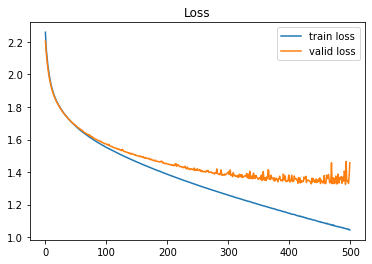

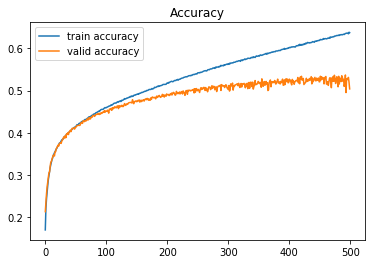

In [9]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()